In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../nyc_data.csv')
data.head()

,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit
0,60912,CONFIDENTIAL,Confidential,2016-04-29T00:00:00.000,2016-04-29T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
1,60914,CONFIDENTIAL,Confidential,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
2,60917,CONFIDENTIAL,Confidential,2016-04-19T00:00:00.000,2016-04-19T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
3,60919,CONFIDENTIAL,Confidential,2016-04-26T00:00:00.000,2016-04-26T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26T00:00:00.000,2023-04-18T00:00:00.000,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 3563
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_id                     2660 non-null   int64         
 1   project_name                   2660 non-null   object        
 2   program_group                  2660 non-null   object        
 3   project_start_date             2660 non-null   datetime64[ns]
 4   project_completion_date        2660 non-null   datetime64[ns]
 5   extended_affordability_status  2660 non-null   int8          
 6   prevailing_wage_status         2660 non-null   object        
 7   extremely_low_income_units     2660 non-null   int64         
 8   very_low_income                2660 non-null   int64         
 9   low_income_units               2660 non-null   int64         
 10  moderate_income                2660 non-null   int64         
 11  middle_income         

In [98]:
# We will convert date columns to datetime format and calculate the project duration
data['project_start_date'] = pd.to_datetime(data['project_start_date'])
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'])
data['project_duration'] = (data['project_completion_date'] - data['project_start_date']).dt.days

In [99]:
#Provide overview of the data that we have in terms of structure and the content
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 3563
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_id                     2660 non-null   int64         
 1   project_name                   2660 non-null   object        
 2   program_group                  2660 non-null   object        
 3   project_start_date             2660 non-null   datetime64[ns]
 4   project_completion_date        2660 non-null   datetime64[ns]
 5   extended_affordability_status  2660 non-null   int8          
 6   prevailing_wage_status         2660 non-null   object        
 7   extremely_low_income_units     2660 non-null   int64         
 8   very_low_income                2660 non-null   int64         
 9   low_income_units               2660 non-null   int64         
 10  moderate_income                2660 non-null   int64         
 11  middle_income         

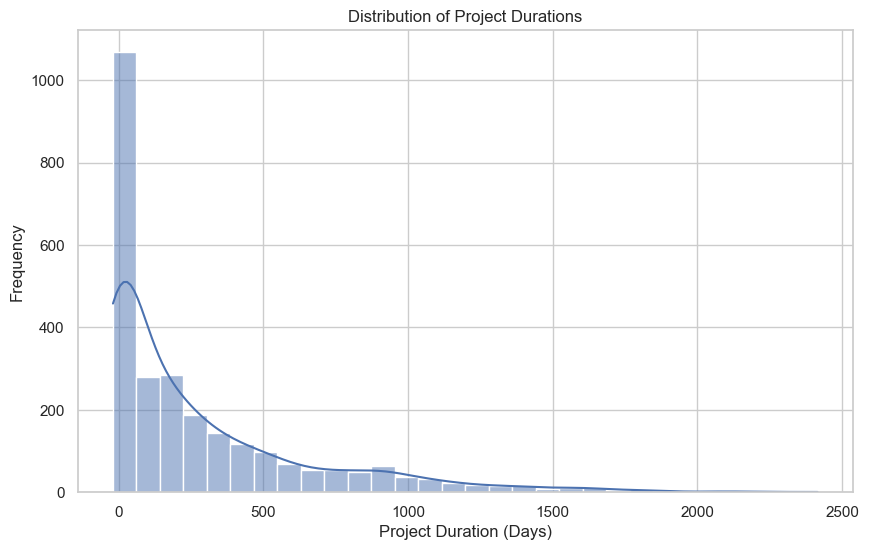

In [100]:
# Looking at the distribution of the overall project durations in terms of frequency and the project duration in days
plt.figure(figsize=(10, 6))
sns.histplot(data['project_duration'], bins=30, kde=True)
plt.title('Distribution of Project Durations')
plt.xlabel('Project Duration (Days)')
plt.ylabel('Frequency')
plt.show()

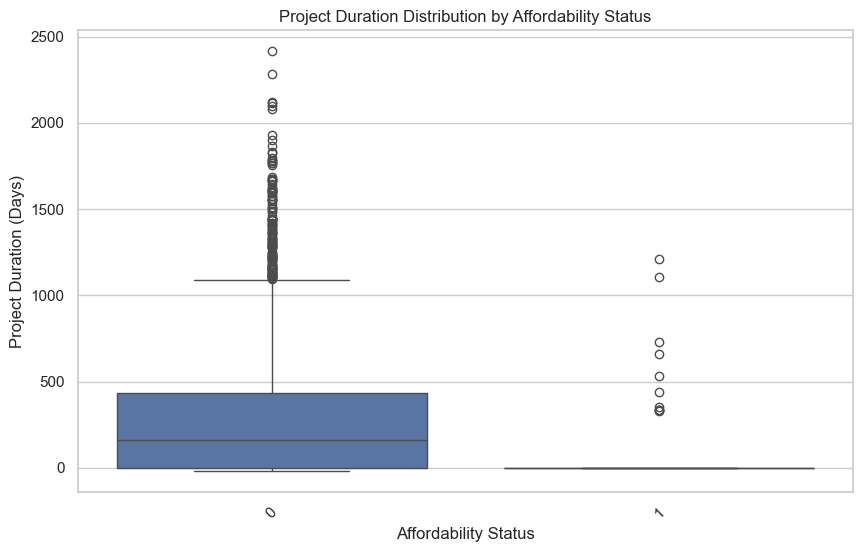

In [102]:
# Box plot for project duration by their affordability status
plt.figure(figsize=(10, 6))
sns.boxplot(x='extended_affordability_status', y='project_duration', data=data)
plt.title('Project Duration Distribution by Affordability Status')
plt.xlabel('Affordability Status')
plt.ylabel('Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()

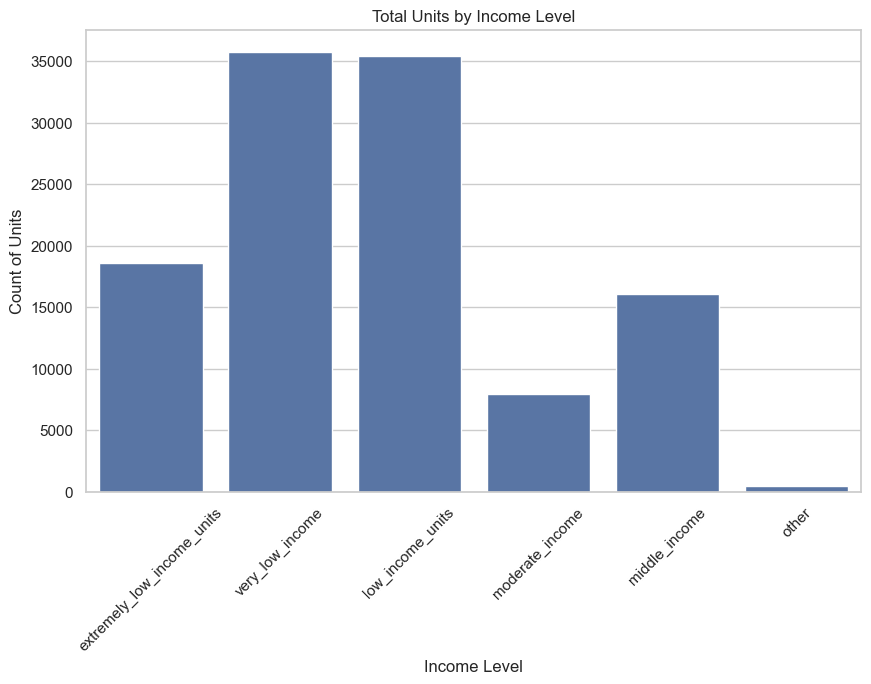

In [103]:
# Looking at the total units by their income level
income_columns = ['extremely_low_income_units', 'very_low_income', 'low_income_units', 'moderate_income', 'middle_income', 'other']
income_data = data[income_columns].sum().reset_index()
income_data.columns = ['Income Level', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Count', data=income_data)
plt.title('Total Units by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count of Units')
plt.xticks(rotation=45)
plt.show()


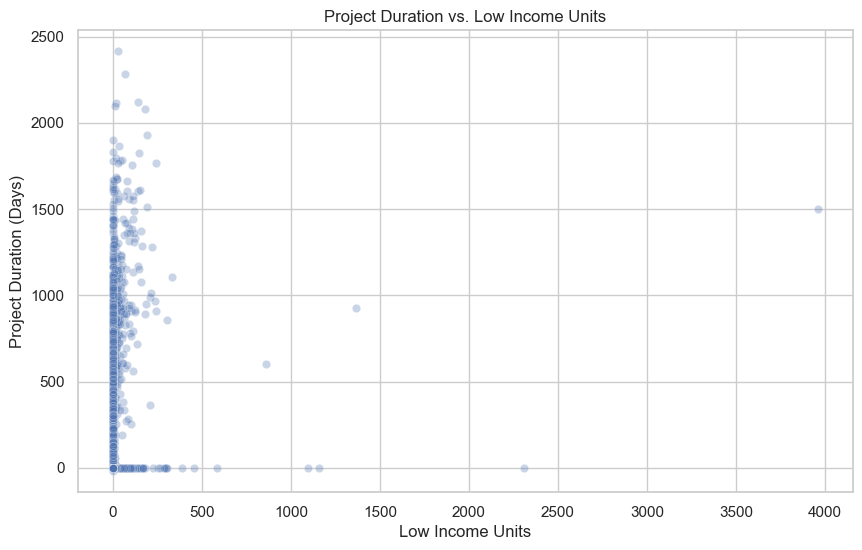

In [104]:
# Scatter plot for the project duration vs. the amount of low income units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='low_income_units', y='project_duration', alpha=0.3)
plt.title('Project Duration vs. Low Income Units')
plt.xlabel('Low Income Units')
plt.ylabel('Project Duration (Days)')
plt.show()

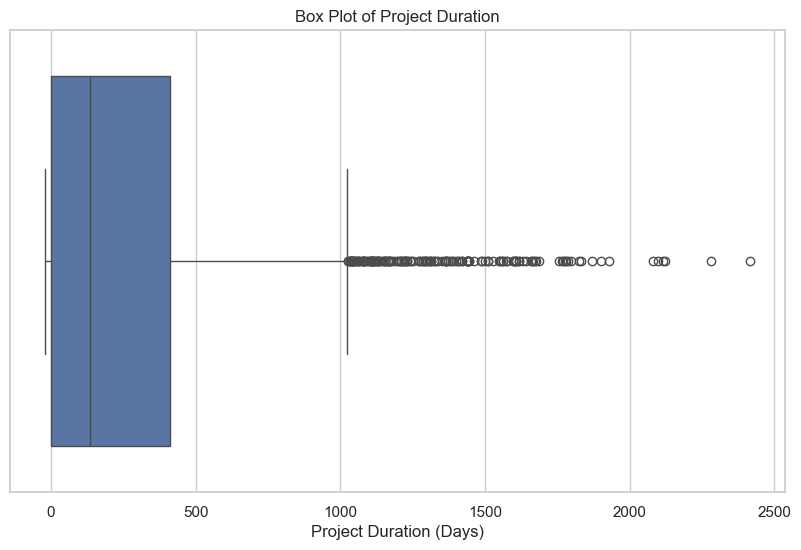

In [105]:
# Here we can check for outliers in the project duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['project_duration'])
plt.title('Box Plot of Project Duration')
plt.xlabel('Project Duration (Days)')
plt.show()

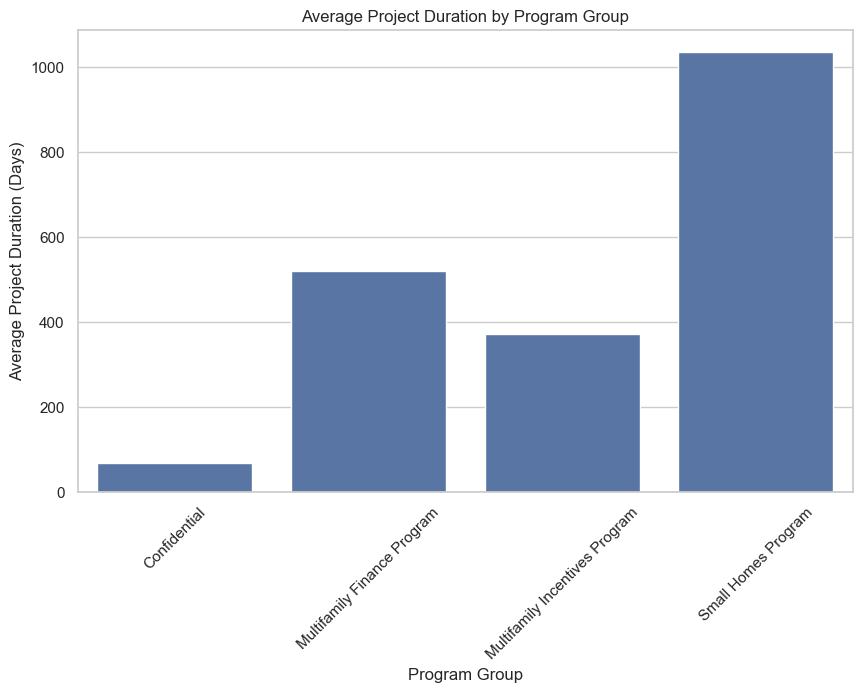

In [106]:
# Analyze the average project duration by the program group
program_group_duration = data.groupby('program_group')['project_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='program_group', y='project_duration', data=program_group_duration)
plt.title('Average Project Duration by Program Group')
plt.xlabel('Program Group')
plt.ylabel('Average Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()

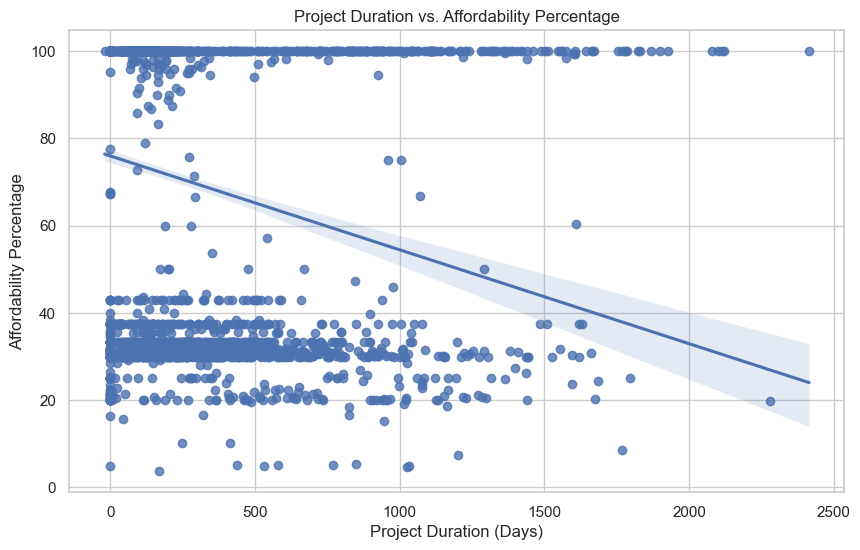

In [107]:
# We are examining the Project Duration vs. Affordability Percentage

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We will convert the date columns to datetime
data['project_start_date'] = pd.to_datetime(data['project_start_date'], errors='coerce')
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'], errors='coerce')

# We will calculate project duration in days
data['project_duration_days'] = (data['project_completion_date'] - data['project_start_date']).dt.days

# We will create a new column called Affordability Percentage
data['affordable_units'] = data[['extremely_low_income_units', 'very_low_income', 
                                  'low_income_units', 'moderate_income', 
                                  'middle_income', 'other']].sum(axis=1)
data['affordability_percentage'] = (data['affordable_units'] / data['total_units']) * 100

# Below is the code for the scatter plot: Project Duration vs. Affordability Percentage
plt.figure(figsize=(10, 6))
sns.regplot(x='project_duration_days', y='affordability_percentage', data=data)
plt.xlabel("Project Duration (Days)")
plt.ylabel("Affordability Percentage")
plt.title("Project Duration vs. Affordability Percentage")
plt.show()

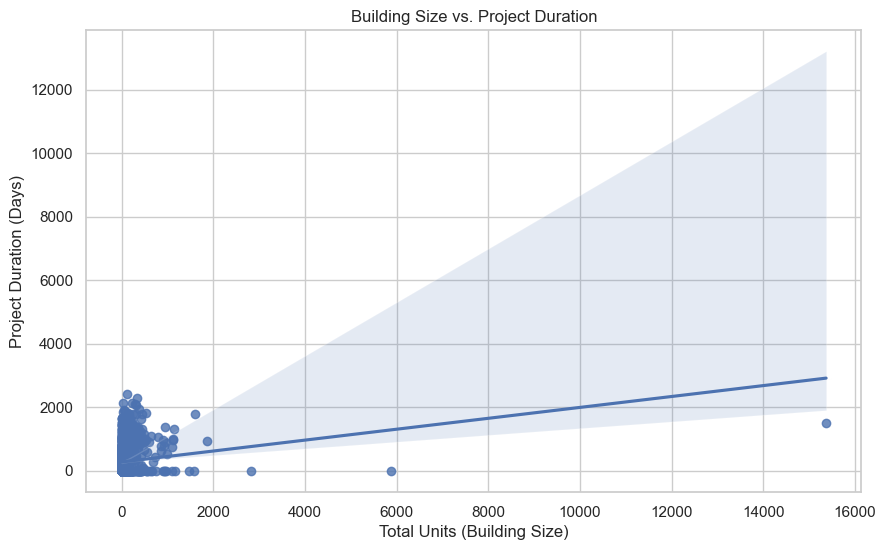

In [108]:
# Project Duration vs. Building Size
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['project_start_date'] = pd.to_datetime(data['project_start_date'], errors='coerce')
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'], errors='coerce')


data['project_duration_days'] = (data['project_completion_date'] - data['project_start_date']).dt.days

data['affordable_units'] = data[['extremely_low_income_units', 'very_low_income', 
                                  'low_income_units', 'moderate_income', 
                                  'middle_income', 'other']].sum(axis=1)
data['affordability_percentage'] = (data['affordable_units'] / data['total_units']) * 100

# Below is the code for our scatter plot: Project Duration vs. Building Size (Total Units)
plt.figure(figsize=(10, 6))
sns.regplot(x='total_units', y='project_duration_days', data=data)
plt.xlabel("Total Units (Building Size)")
plt.ylabel("Project Duration (Days)")
plt.title("Building Size vs. Project Duration")
plt.show()

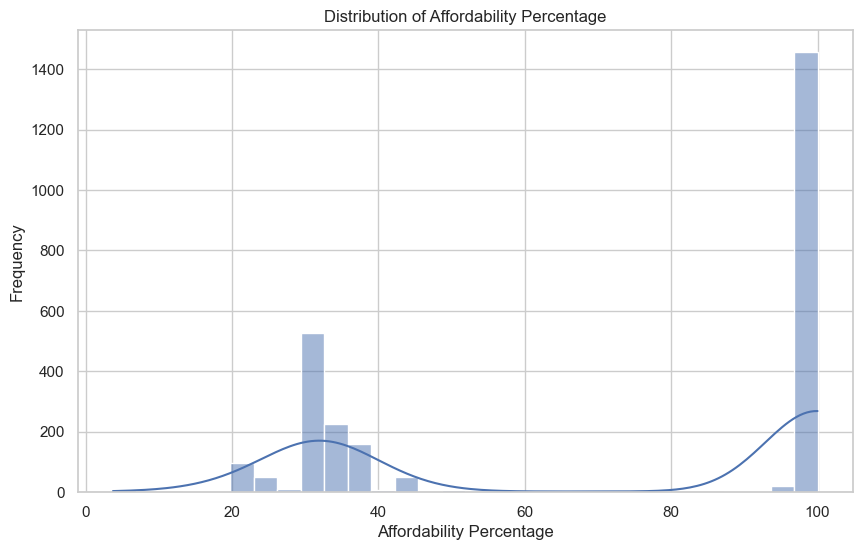

In [110]:
# Distribution of Affordability Percentage

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['project_start_date'] = pd.to_datetime(data['project_start_date'], errors='coerce')
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'], errors='coerce')

data['project_duration_days'] = (data['project_completion_date'] - data['project_start_date']).dt.days

data['affordable_units'] = data[['extremely_low_income_units', 'very_low_income', 
                                  'low_income_units', 'moderate_income', 
                                  'middle_income', 'other']].sum(axis=1)
data['affordability_percentage'] = (data['affordable_units'] / data['total_units']) * 100

# Below is the code for Distribution Plot for Affordability Percentage
plt.figure(figsize=(10, 6))
sns.histplot(data['affordability_percentage'], bins=30, kde=True)
plt.title("Distribution of Affordability Percentage")
plt.xlabel("Affordability Percentage")
plt.ylabel("Frequency")
plt.show()

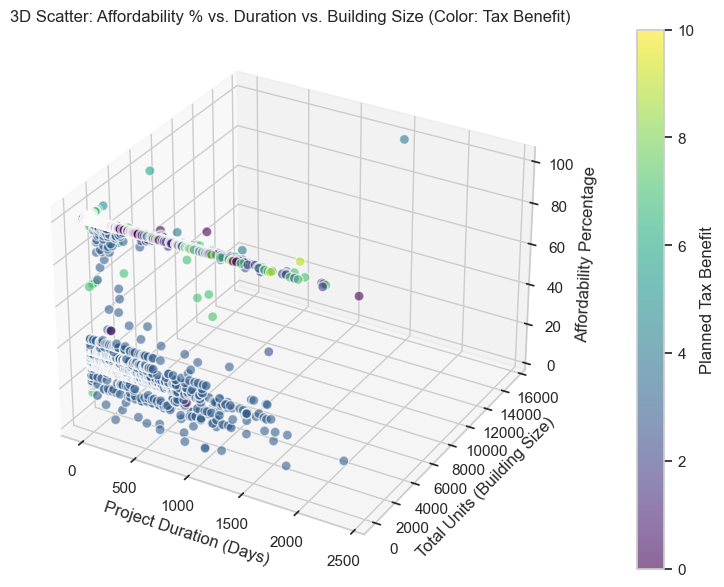

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data['project_start_date'] = pd.to_datetime(data['project_start_date'], errors='coerce')
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'], errors='coerce')

data['project_duration_days'] = (data['project_completion_date'] - data['project_start_date']).dt.days

data['affordable_units'] = data[['extremely_low_income_units', 'very_low_income', 
                                 'low_income_units', 'moderate_income', 
                                 'middle_income', 'other']].sum(axis=1)

data['affordability_percentage'] = (data['affordable_units'] / data['total_units']) * 100

# We are converting categorical Planned Tax Benefit to numerical and dropping rows with missing values
data['planned_tax_benefit'] = data['planned_tax_benefit'].astype('category').cat.codes
data = data.dropna(subset=['affordability_percentage', 'project_duration_days', 'total_units'])

# Below is the code for our 3D Scatter Plot: Affordability Percentage vs. Project Duration vs. Total Units
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# We set up color mapping
norm = plt.Normalize(data['planned_tax_benefit'].min(), data['planned_tax_benefit'].max())
colors = plt.cm.viridis(norm(data['planned_tax_benefit']))

# Here we create the scatter plot
sc = ax.scatter(data['project_duration_days'], data['total_units'], data['affordability_percentage'], 
                c=data['planned_tax_benefit'], cmap='viridis', s=50, alpha=0.6, edgecolors='w')

# These are the labels for all of our axis
ax.set_xlabel("Project Duration (Days)")
ax.set_ylabel("Total Units (Building Size)")
ax.set_zlabel("Affordability Percentage")
plt.title("3D Scatter: Affordability % vs. Duration vs. Building Size (Color: Tax Benefit)")

# We set the colorbar for tax benefits
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Planned Tax Benefit')

plt.show()
